# Random Forest for Phone Changes

Importing libraries

In [3]:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Dividing dates into intervals
from datetime import timedelta

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

Reading `MODEL_TRAINING.csv` file into a dataframe

In [4]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("MODEL_TRAINING.csv")

Aggregating the dataframe by `ID` to compute the total days used, total post-purchase days, and the number of unique devices.


In [5]:
agg_df = df.groupby('ID').agg(
    TOTAL_DAYS_USED=('DAYS_USED', 'sum'),
    TOTAL_POST_PURCHASE_DAYS=('POST_RELEASE_PURCHASE', 'sum'),
    N_DEVICES=('DEVICE_ID', 'nunique')
).reset_index()

Neglecting non-important columns in the reseulting dataframe.

In [6]:
df = df[['ID', 'DEVICE_ID', 'POST_RELEASE_PURCHASE', 'DAYS_USED',
       'AVG_DAYS_USED', 'SUPPORTS_LTE', 'SUPPORTS_VOLTE', 'BAND_1800',
       'BAND_1900', 'BAND_850', 'BAND_900', 'CAMERA_FLASHLIGHT',
       'SUPPORTS_MULTISIM', 'SUPPORTS_ESIM', 'SUPPORT_5G', 'RAM_SIZE',
       'SIM_COUNT', 'CPU_CORES', 'BATTERY_CAPACITY', 'BODY_DEPTH',
       'BODY_HEIGHT', 'BODY_WIDTH', 'BODY_TYPE', 'PIXEL_DENSITY', 'OS_CODE',
       'BATTERY_TYPE_CODE', 'MULTISIM_MODE_CODE', 'BRAND_CODE', 'MODEL_CODE',
       'NETTYPE_CODE', 'START_DATE', 'END_DATE', 'RELEASE_DATE']]

In [7]:
df_sample = df.sample(50000)

Preparing data and training a `RandomForestClassifier`.

In [8]:
X = df_sample[['POST_RELEASE_PURCHASE', 'DAYS_USED',
       'AVG_DAYS_USED','RAM_SIZE','SIM_COUNT', 'CPU_CORES', 'BATTERY_CAPACITY']]
y = df_sample[ 'SUPPORTS_LTE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predicting with the trained model.

In [9]:
y_pred = rf_classifier.predict(X_test)

Calculating ***accuracy*** and generating a ***classification report***.


In [10]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n")
print(classification_rep)


Accuracy: 0.98

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3192
           1       0.99      0.99      0.99      6808

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Calculateing `AVG_DAYS` and `AVG_POST_DAYS` by dividing total days and post-purchase days by the number of devices.

In [11]:
agg_df['AVG_DAYS'] = agg_df['TOTAL_DAYS_USED'] / agg_df['N_DEVICES']
agg_df['AVG_DAYS'] = agg_df['AVG_DAYS'].round(2)

agg_df['AVG_POST_DAYS'] = agg_df['TOTAL_POST_PURCHASE_DAYS'] / agg_df['N_DEVICES']
agg_df['AVG_POST_DAYS'] = agg_df['AVG_POST_DAYS'].round(2)


In [12]:
agg_df

,ID,TOTAL_DAYS_USED,TOTAL_POST_PURCHASE_DAYS,N_DEVICES,AVG_DAYS,AVG_POST_DAYS
0,1,1338,1750,2,669.00,875.00
1,2,3468,12891,10,346.80,1289.10
2,5,1467,3904,3,489.00,1301.33
3,6,1347,6347,3,449.00,2115.67
4,7,2231,7991,4,557.75,1997.75
...,...,...,...,...,...,...
2974494,6400384,60,1461,1,60.00,1461.00
2974495,6400401,2659,882,1,2659.00,882.00
2974496,6400404,425,395,1,425.00,395.00
2974497,6400410,3299,456,1,3299.00,456.00


In [13]:
df_30d = df[df['ID'] < 6400500]

In [14]:
df_30d

,ID,DEVICE_ID,POST_RELEASE_PURCHASE,DAYS_USED,AVG_DAYS_USED,SUPPORTS_LTE,SUPPORTS_VOLTE,BAND_1800,BAND_1900,BAND_850,BAND_900,CAMERA_FLASHLIGHT,SUPPORTS_MULTISIM,SUPPORTS_ESIM,SUPPORT_5G,RAM_SIZE,SIM_COUNT,CPU_CORES,BATTERY_CAPACITY,BODY_DEPTH,BODY_HEIGHT,BODY_WIDTH,BODY_TYPE,PIXEL_DENSITY,OS_CODE,BATTERY_TYPE_CODE,MULTISIM_MODE_CODE,BRAND_CODE,MODEL_CODE,NETTYPE_CODE,START_DATE,END_DATE,RELEASE_DATE
0,1,1343900,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.60,123.8,58.60,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2016-03-01,2017-05-31,2012-08-16
1,1,35579407,457,882,642.5,1,0,1,1,1,1,1,0,0,0,2048,1,8,1642,7.60,123.8,58.60,0.985922,326,0.211316,0,2,0.211316,0.004705,4,2017-06-01,2019-10-31,2016-03-01
2,2,86545602,1127,910,531.1,0,0,1,1,1,1,1,1,0,0,512,2,8,1800,11.50,131.5,67.90,0.985922,218,0.741953,0,2,0.040123,0.001340,3,2017-01-01,2019-06-30,2013-12-01
3,2,35152604,2491,637,403.3,0,0,1,1,1,1,0,0,0,0,0,1,1,1320,15.50,111.0,51.70,0.985922,229,0.022345,0,2,0.040552,0.000028,3,2017-02-01,2018-10-31,2010-04-08
4,2,35930004,2618,89,444.1,0,0,1,1,1,1,1,0,0,0,512,1,8,1300,12.50,119.0,62.40,0.985922,252,0.010124,0,2,0.040552,0.000361,3,2018-12-01,2019-02-28,2011-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12354469,6400384,35168305,1461,60,339.0,0,0,1,1,1,1,0,0,0,0,128,1,8,1320,15.50,111.0,51.70,0.985922,229,0.022345,0,2,0.040552,0.001433,3,2013-10-01,2013-11-30,2009-10-01
12354470,6400401,35758506,882,2659,610.7,1,1,1,1,1,1,1,0,0,0,2048,1,8,2600,7.74,157.7,78.74,0.985922,267,0.741953,1,2,0.013128,0.000035,4,2017-04-01,2024-07-12,2014-11-01
12354471,6400404,1363300,395,425,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,2,1400,7.60,123.8,58.60,0.985922,326,0.211316,1,2,0.211316,0.010954,4,2013-10-01,2014-11-30,2012-09-01
12354472,6400410,86597302,456,3299,554.9,0,0,1,1,1,1,0,1,0,0,512,2,4,1900,9.90,141.0,71.80,0.985922,196,0.741953,0,2,0.040123,0.004121,3,2015-07-01,2024-07-12,2014-04-01


Convert `START_DATE` and `END_DATE` in `df_30d` to datetime format.


In [15]:
df_30d['START_DATE'] = pd.to_datetime(df_30d['START_DATE'])
df_30d['END_DATE'] = pd.to_datetime(df_30d['END_DATE'])

In [16]:
df_30d = df_30d.sort_values('ID',ascending=True)

In [17]:
df_500 = df_30d[df_30d['ID'] < 100000]

Splitting rows into ***30-day periods*** and creating a new DataFrame with the results.


In [18]:
# Function to split rows into 30-day periods
def split_into_30_day_periods(row):
    periods = []
    start_date = row['START_DATE']
    end_date = row['END_DATE']
    while start_date < end_date:
        period_end_date = min(start_date + timedelta(days=30), end_date)
        new_row = row.copy()
        new_row['START_DATE'] = start_date
        new_row['END_DATE'] = period_end_date
        periods.append(new_row)
        start_date = period_end_date
    return periods

new_rows = []
for index, row in df_500.iterrows():
    new_rows.extend(split_into_30_day_periods(row))

new_df = pd.DataFrame(new_rows)


In [ ]:
new_df['ID'].nunique()

91488

Marking `CHANGED` as 1 for different consecutive `DEVICE_ID`s and ensuring the last row for each user has `CHANGED` as 0.

In [ ]:
#IF 2 subseqnet rows of any user have different id the preceeding row in'CHANGED' column gets 1 otherwise 0
new_df['CHANGED'] = (new_df['DEVICE_ID'] != new_df.groupby('ID')['DEVICE_ID'].shift(-1)).astype(int)

#For all users' last entries the last row 'CHANGED' columns must have 0 as a value
new_df['CHANGED'] = new_df.groupby('ID')['CHANGED'].shift(1, fill_value=0)

In [ ]:
new_df['ID'].max()

149999

In [ ]:
new_df.head(50)

,ID,DEVICE_ID,POST_RELEASE_PURCHASE,DAYS_USED,AVG_DAYS_USED,SUPPORTS_LTE,SUPPORTS_VOLTE,BAND_1800,BAND_1900,BAND_850,BAND_900,CAMERA_FLASHLIGHT,SUPPORTS_MULTISIM,SUPPORTS_ESIM,SUPPORT_5G,RAM_SIZE,SIM_COUNT,CPU_CORES,BATTERY_CAPACITY,BODY_DEPTH,BODY_HEIGHT,BODY_WIDTH,BODY_TYPE,PIXEL_DENSITY,OS_CODE,BATTERY_TYPE_CODE,MULTISIM_MODE_CODE,BRAND_CODE,MODEL_CODE,NETTYPE_CODE,START_DATE,END_DATE,RELEASE_DATE,CHANGED
0,1,1343900,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2016-03-01,2016-03-31,2012-08-16,0
0,1,1343900,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2016-03-31,2016-04-30,2012-08-16,0
0,1,1343900,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2016-04-30,2016-05-30,2012-08-16,0
0,1,1343900,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2016-05-30,2016-06-29,2012-08-16,0
0,1,1343900,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2016-06-29,2016-07-29,2012-08-16,0
0,1,1343900,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2016-07-29,2016-08-28,2012-08-16,0
0,1,1343900,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2016-08-28,2016-09-27,2012-08-16,0
0,1,1343900,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2016-09-27,2016-10-27,2012-08-16,0
0,1,1343900,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2016-10-27,2016-11-26,2012-08-16,0
0,1,1343900,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2016-11-26,2016-12-26,2012-08-16,0


In [ ]:
new_df.columns

Index(['ID', 'DEVICE_ID', 'POST_RELEASE_PURCHASE', 'DAYS_USED',
       'AVG_DAYS_USED', 'SUPPORTS_LTE', 'SUPPORTS_VOLTE', 'BAND_1800',
       'BAND_1900', 'BAND_850', 'BAND_900', 'CAMERA_FLASHLIGHT',
       'SUPPORTS_MULTISIM', 'SUPPORTS_ESIM', 'SUPPORT_5G', 'RAM_SIZE',
       'SIM_COUNT', 'CPU_CORES', 'BATTERY_CAPACITY', 'BODY_DEPTH',
       'BODY_HEIGHT', 'BODY_WIDTH', 'BODY_TYPE', 'PIXEL_DENSITY', 'OS_CODE',
       'BATTERY_TYPE_CODE', 'MULTISIM_MODE_CODE', 'BRAND_CODE', 'MODEL_CODE',
       'NETTYPE_CODE', 'START_DATE', 'END_DATE', 'RELEASE_DATE', 'CHANGED'],
      dtype='object')

Random Forest Custom Function

In [ ]:
def rf_model_pipeline(X, y, test_size = 0.2, random_state = 42, n_estimators = 100):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size, random_state)

    rf_classifier = RandomForestClassifier(n_estimators, random_state)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Print the accuracy
    print(f"Accuracy: {accuracy:.2f}")

    # Print the classification report
    print("\nClassification Report:\n")
    print(classification_rep)

In [ ]:
new_df['CHANGED'].value_counts()

CHANGED
0    7858972
1     311901
Name: count, dtype: int64

Generating and sorting unique random user IDs, then filter `new_df` to include only rows with these IDs.


In [ ]:
min_value = 2
max_value = 500000
sample_size = 100000

# Ensure the maximum value for the sample is within the DataFrame range
max_value = min(max_value, len(new_df))

# Generate unique random user IDs
random_user_ids = np.random.choice(range(min_value, max_value + 1), size=sample_size, replace=False)

# Sort the list
sorted_user_ids = np.sort(random_user_ids)

# Convert to list
sorted_user_ids_list = sorted_user_ids.tolist()

# Select rows from the DataFrame based on sorted user IDs
# Ensure the DataFrame has 'user_id' column to match the random_user_ids
selected_users_df = new_df[new_df['ID'].isin(sorted_user_ids_list)]

In [ ]:
selected_users_df

,ID,DEVICE_ID,POST_RELEASE_PURCHASE,DAYS_USED,AVG_DAYS_USED,SUPPORTS_LTE,SUPPORTS_VOLTE,BAND_1800,BAND_1900,BAND_850,BAND_900,CAMERA_FLASHLIGHT,SUPPORTS_MULTISIM,SUPPORTS_ESIM,SUPPORT_5G,RAM_SIZE,SIM_COUNT,CPU_CORES,BATTERY_CAPACITY,BODY_DEPTH,BODY_HEIGHT,BODY_WIDTH,BODY_TYPE,PIXEL_DENSITY,OS_CODE,BATTERY_TYPE_CODE,MULTISIM_MODE_CODE,BRAND_CODE,MODEL_CODE,NETTYPE_CODE,START_DATE,END_DATE,RELEASE_DATE,CHANGED
49,20,1342700,2572,365,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2019-09-01,2019-10-01,2012-08-16,0
49,20,1342700,2572,365,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2019-10-01,2019-10-31,2012-08-16,0
49,20,1342700,2572,365,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2019-10-31,2019-11-30,2012-08-16,0
49,20,1342700,2572,365,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2019-11-30,2019-12-30,2012-08-16,0
49,20,1342700,2572,365,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,0.211316,1,2,0.211316,0.010954,3,2019-12-30,2020-01-29,2012-08-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403346,149979,35637306,316,304,314.3,0,0,1,1,1,1,1,1,0,0,512,2,8,1300,12.5,115.5,62.0,0.985922,165,0.741953,0,3,0.000020,0.000001,3,2016-02-26,2016-03-27,2014-08-19,0
403346,149979,35637306,316,304,314.3,0,0,1,1,1,1,1,1,0,0,512,2,8,1300,12.5,115.5,62.0,0.985922,165,0.741953,0,3,0.000020,0.000001,3,2016-03-27,2016-04-26,2014-08-19,0
403346,149979,35637306,316,304,314.3,0,0,1,1,1,1,1,1,0,0,512,2,8,1300,12.5,115.5,62.0,0.985922,165,0.741953,0,3,0.000020,0.000001,3,2016-04-26,2016-04-30,2014-08-19,0
403345,149979,35486404,1137,30,374.9,0,0,1,1,1,1,1,0,0,0,256,1,1,1200,13.6,123.7,62.4,0.003194,184,0.022345,0,2,0.040552,0.000123,3,2013-12-01,2013-12-31,2010-10-21,1


In [ ]:
selected_users_df['CHANGED'].value_counts()

CHANGED
0    1572096
1      62737
Name: count, dtype: int64

Separate rows by `CHANGED` values, sample 10,000 rows from each subset, concatenate, shuffle, and reset the index.


In [ ]:
# Separate rows based on 'CHANGED' values
changed_1 = selected_users_df[selected_users_df['CHANGED'] == 1]
changed_0 = selected_users_df[selected_users_df['CHANGED'] == 0]

# Randomly sample 10,000 rows from each subset
sampled_1 = changed_1.sample(n=10000, random_state=42)
sampled_0 = changed_0.sample(n=10000, random_state=42)

# Concatenate the sampled DataFrames
temp_df = pd.concat([sampled_1, sampled_0])

# Shuffle the DataFrame and reset the index
temp_df = temp_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# changed_1 = new_df[new_df['CHANGED'] == 1]
# changed_0 = new_df[new_df['CHANGED'] == 0]

# sampled_1 = changed_1.sample(n=10000, random_state=42)
# sampled_0 = changed_0.sample(n=10000, random_state=42)

# temp_df = pd.concat([sampled_1, sampled_0])

# temp_df = temp_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
temp_df

,ID,DEVICE_ID,POST_RELEASE_PURCHASE,DAYS_USED,AVG_DAYS_USED,SUPPORTS_LTE,SUPPORTS_VOLTE,BAND_1800,BAND_1900,BAND_850,BAND_900,CAMERA_FLASHLIGHT,SUPPORTS_MULTISIM,SUPPORTS_ESIM,SUPPORT_5G,RAM_SIZE,SIM_COUNT,CPU_CORES,BATTERY_CAPACITY,BODY_DEPTH,BODY_HEIGHT,BODY_WIDTH,BODY_TYPE,PIXEL_DENSITY,OS_CODE,BATTERY_TYPE_CODE,MULTISIM_MODE_CODE,BRAND_CODE,MODEL_CODE,NETTYPE_CODE,START_DATE,END_DATE,RELEASE_DATE,CHANGED
0,2539,86277403,396,911,368.4,1,1,1,1,1,1,1,1,0,0,4096,2,8,3257,9.00,147.8,71.88,0.985922,338,0.741953,0,2,0.000818,0.000244,4,2019-05-24,2019-06-23,2016-08-01,0
1,31944,35669808,2098,27,628.6,1,1,1,1,1,1,1,0,0,0,2048,1,8,3257,7.30,138.4,67.30,0.985922,326,0.211316,0,2,0.211316,0.005782,4,2023-02-01,2023-02-28,2017-05-05,1
2,133015,35185307,244,1522,574.2,0,0,1,1,1,1,1,1,0,0,1024,2,4,3000,9.00,157.9,81.50,0.985922,259,0.010124,0,2,0.001442,0.000325,3,2015-12-01,2015-12-31,2015-04-01,1
3,149139,35735709,1326,803,574.8,1,1,1,1,1,1,1,1,1,0,3072,1,6,2942,8.30,150.9,75.70,0.985922,326,0.211316,0,2,0.211316,0.003872,4,2022-05-01,2022-05-31,2018-09-13,1
4,14237,35898307,640,2415,766.4,1,1,1,1,1,1,1,1,1,0,4096,2,8,3600,7.70,150.9,72.60,0.985922,534,0.741953,0,2,0.399493,0.001766,4,2018-03-01,2018-03-31,2016-03-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,126400,35361507,1796,1156,699.6,0,0,1,1,1,1,1,1,0,0,1024,2,4,1900,6.90,130.1,65.50,0.985922,244,0.741953,0,2,0.399493,0.001280,3,2021-10-21,2021-11-20,2014-12-01,0
19996,16982,35667337,289,669,493.6,1,1,1,1,1,1,0,0,1,1,4096,1,6,3257,7.65,146.7,71.50,0.985922,457,0.211316,0,2,0.211316,0.004022,5,2023-02-26,2023-03-28,2021-09-15,0
19997,139366,35945906,1020,29,652.2,0,0,1,1,1,1,1,1,0,0,1536,2,4,2100,8.60,136.6,70.60,0.985922,306,0.741953,0,2,0.399493,0.001565,3,2016-11-01,2016-11-30,2014-01-16,1
19998,44215,86344603,578,729,521.0,0,0,1,1,1,1,0,1,0,0,1024,2,4,2000,10.60,124.5,64.00,0.985922,233,0.741953,0,2,0.017974,0.001012,3,2017-04-01,2017-05-01,2015-09-01,1


Extract features and target from `temp_df`.


In [ ]:
features_df = temp_df[['POST_RELEASE_PURCHASE', 'DAYS_USED',
       'AVG_DAYS_USED', 'SUPPORTS_LTE', 'SUPPORTS_VOLTE', 'BAND_1800',
       'BAND_1900', 'BAND_850', 'BAND_900', 'CAMERA_FLASHLIGHT',
       'SUPPORTS_MULTISIM', 'SUPPORTS_ESIM', 'SUPPORT_5G', 'RAM_SIZE',
       'SIM_COUNT', 'CPU_CORES', 'BATTERY_CAPACITY', 'BODY_DEPTH',
       'BODY_HEIGHT', 'BODY_WIDTH', 'BODY_TYPE', 'PIXEL_DENSITY', 'OS_CODE',
       'BATTERY_TYPE_CODE', 'MULTISIM_MODE_CODE', 'BRAND_CODE', 'MODEL_CODE',
       'NETTYPE_CODE']]
target = temp_df['CHANGED']

Splitting data into training and test sets, training a `RandomForestClassifier`, predicting on the test set.

Calculating ***accuracy***, then generating and printing the ***classification report***.

In [ ]:
X = features_df
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n")
print(classification_rep)

Accuracy: 0.63

Classification Report:

              precision    recall  f1-score   support

           0       0.61      0.65      0.63      1945
           1       0.65      0.62      0.63      2055

    accuracy                           0.63      4000
   macro avg       0.63      0.63      0.63      4000
weighted avg       0.63      0.63      0.63      4000



Calculateing and printing the ***confusion matrix*** for the test predictions.


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[1257  688]
 [ 789 1266]]


Displaying the confusion matrix using `ConfusionMatrixDisplay` and plotting it.

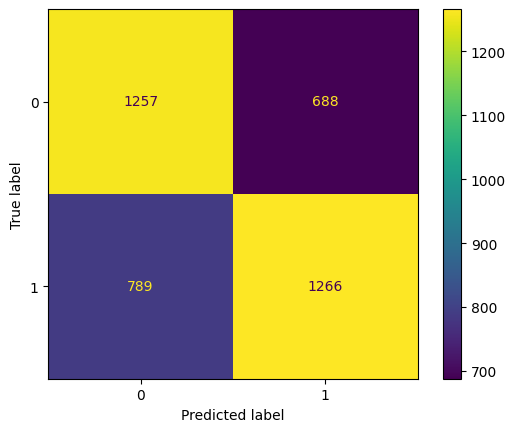

In [ ]:
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])

cm_display.plot()
plt.show()